# Animal Sleep Pattern Analysis

---
## 1. Problem Statement:
The objective of this project is to analyze sleep patterns of different animal species and understand how sleep duration varies based on factors such as dietary category, body weight, and taxonomic order. This analysis aims to derive meaningful insights using exploratory data analysis techniques in Python.

---
## 2. Dataset Understanding

### 2.1 Dataset Overview

Animal sleep dataset (originally from the ggplot2 package in R).
Each row represents one animal species, along with its sleep characteristics and biological attributes.

---
### 2.2 Key Columns

#### Typical columns include:

name – Animal name

sleep_total – Total hours of sleep per day

sleep_rem – REM sleep hours

sleep_cycle – Sleep cycle length

awake – Awake hours per day

brainwt – Brain weight

bodywt – Body weight

vore – Diet type (carnivore, herbivore, omnivore)

order – Animal order (Carnivora, Primates, Rodentia, etc.)

---
## 3. Data Loading & Initial Inspection
In this section, the dataset is loaded into Python and an initial inspection is performed to understand its structure and basic characteristics.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/srisreedhar/DataSets/refs/heads/master/animal_sleeptime_ggplot2.csv"
df = pd.read_csv(url)

df


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


## 3.1 Dataset Shape & Size

In [2]:
df.shape

(83, 11)

### 3.2 Column Names

In [3]:
df.columns

Index(['name', 'genus', 'vore', 'order', 'conservation', 'sleep_total',
       'sleep_rem', 'sleep_cycle', 'awake', 'brainwt', 'bodywt'],
      dtype='object')


### 3.3 Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


### 3.4 Missing Values Overview

In [5]:
df.isna().sum()

name             0
genus            0
vore             7
order            0
conservation    29
sleep_total      0
sleep_rem       22
sleep_cycle     51
awake            0
brainwt         27
bodywt           0
dtype: int64

---
## 4: Exploratory Data Analysis

### 4.1 Univariate Analysis – Total Sleep (sleep_total)

Question:

How much do animals sleep in general, and how does total sleep vary across species?

In [6]:
df['sleep_total'].describe()

count    83.000000
mean     10.433735
std       4.450357
min       1.900000
25%       7.850000
50%      10.100000
75%      13.750000
max      19.900000
Name: sleep_total, dtype: float64

### 4.1 Total Sleep Insights

Animals show a wide variation in total sleep duration, ranging from very low sleep (2 hours) to extremely high sleep (20 hours) per day.

The average sleep duration (10 hours) is higher than that of humans, indicating diverse sleep needs across species.

The distribution appears fairly balanced, as mean and median values are close.

---

### 4.2 Univariate Analysis – REM sleep (sleep_rem)

#### Question:

How much REM sleep do animals get, and how much variation exists across species?

In [7]:
df['sleep_rem'].describe()

count    61.000000
mean      1.875410
std       1.298288
min       0.100000
25%       0.900000
50%       1.500000
75%       2.400000
max       6.600000
Name: sleep_rem, dtype: float64

### 4.2 REM sleep Insights
REM sleep duration varies significantly across species, with some animals exhibiting minimal REM sleep and others showing extended REM periods.

The average REM sleep is around 2 hours, which is comparable to human REM sleep duration.

REM sleep data is missing for several species, so insights are based only on available observations.

---
### 4.3 sleep_cycle

#### Question:

What is the typical sleep cycle length in animals, and do most animals have short or long sleep cycles?

In [8]:
df['sleep_cycle'].describe()

count    32.000000
mean      0.439583
std       0.358680
min       0.116667
25%       0.183333
50%       0.333333
75%       0.579167
max       1.500000
Name: sleep_cycle, dtype: float64

#### 4.3.1 Unit Conversion (Sleep Cycle in Minutes)

In [9]:
df['sleep_cycle_min'] = df['sleep_cycle'] * 60

In [10]:
df['sleep_cycle_min'].describe()

count    32.000000
mean     26.375000
std      21.520808
min       7.000000
25%      11.000000
50%      20.000000
75%      34.750000
max      90.000000
Name: sleep_cycle_min, dtype: float64

Sleep cycle duration was converted from hours to minutes to improve interpretability while preserving the original values.

In [11]:
df[['name','sleep_total','sleep_rem','sleep_cycle', 'sleep_cycle_min']]

,name,sleep_total,sleep_rem,sleep_cycle,sleep_cycle_min
0,Cheetah,12.1,NaN,NaN,NaN
1,Owl monkey,17.0,1.8,NaN,NaN
2,Mountain beaver,14.4,2.4,NaN,NaN
3,Greater short-tailed shrew,14.9,2.3,0.133333,8.0
4,Cow,4.0,0.7,0.666667,40.0
...,...,...,...,...,...
78,Tree shrew,8.9,2.6,0.233333,14.0
79,Bottle-nosed dolphin,5.2,NaN,NaN,NaN
80,Genet,6.3,1.3,NaN,NaN
81,Arctic fox,12.5,NaN,NaN,NaN


### 4.3 sleep_cycle Insights

Most animals exhibit short sleep cycles, suggesting fragmented sleep and frequent transitions between sleep stages.

Only a few species show long, human-like sleep cycles, indicating consolidated sleep patterns.

Sleep cycle data is available for a limited number of animals, so conclusions from this variable should be interpreted cautiously.

---
## 4.4 — Bivariate Analysis: REM Sleep vs Animal Order

#### Question:

How does REM sleep vary across different animal orders?

### 4.4.1 Understanding the grouping variable (order)

In [12]:
df['order'].unique()

array(['Carnivora', 'Primates', 'Rodentia', 'Soricomorpha',
       'Artiodactyla', 'Pilosa', 'Cingulata', 'Hyracoidea',
       'Didelphimorphia', 'Proboscidea', 'Chiroptera', 'Perissodactyla',
       'Erinaceomorpha', 'Cetacea', 'Lagomorpha', 'Diprotodontia',
       'Monotremata', 'Afrosoricida', 'Scandentia'], dtype=object)

The dataset contains multiple animal orders, representing different biological classifications used to compare sleep patterns across groups.

### 4.4.2 Distribution of animals across orders

In [13]:
df.groupby('order').size()

order
Afrosoricida        1
Artiodactyla        6
Carnivora          12
Cetacea             3
Chiroptera          2
Cingulata           2
Didelphimorphia     2
Diprotodontia       2
Erinaceomorpha      2
Hyracoidea          3
Lagomorpha          1
Monotremata         1
Perissodactyla      3
Pilosa              1
Primates           12
Proboscidea         2
Rodentia           22
Scandentia          1
Soricomorpha        5
dtype: int64

### 4.4.2 Insight
Most animal orders contain very few species, while only a small number of orders (Rodentia, Carnivora, and Primates) have relatively larger sample sizes. This imbalance is important to consider when interpreting order-level comparisons, as results from smaller groups may be less reliable.

---
### 4.4.3 REM Sleep by Animal Order:

In [14]:
df.groupby('order')['sleep_rem'].mean().sort_values(ascending=False)

order
Didelphimorphia    5.750000
Cingulata          4.600000
Erinaceomorpha     3.100000
Chiroptera         2.950000
Scandentia         2.600000
Afrosoricida       2.300000
Pilosa             2.200000
Rodentia           2.023077
Soricomorpha       2.000000
Carnivora          1.871429
Diprotodontia      1.650000
Primates           1.250000
Artiodactyla       0.940000
Lagomorpha         0.900000
Perissodactyla     0.666667
Hyracoidea         0.533333
Cetacea            0.100000
Monotremata             NaN
Proboscidea             NaN
Name: sleep_rem, dtype: float64

In [15]:
df[df['order'].isin(['Monotremata', 'Proboscidea'])][['name','order','sleep_rem']]

,name,order,sleep_rem
20,Asian elephant,Proboscidea,NaN
35,African elephant,Proboscidea,NaN
74,Short-nosed echidna,Monotremata,NaN


REM sleep Proboscidea and Monotremata, show NaN values because REM sleep data is missing for all species in these groups, not because the groups are absent. Therefore, REM sleep comparisons are based only on orders where REM data is available.

In [16]:
df[df['order'].isin(['Didelphimorphia','Cingulata','Erinaceomorpha'])][['name','order','sleep_rem']].sort_values(by='order',ascending=False)

,name,order,sleep_rem
24,European hedgehog,Erinaceomorpha,3.5
54,Desert hedgehog,Erinaceomorpha,2.7
19,North American Opossum,Didelphimorphia,4.9
36,Thick-tailed opposum,Didelphimorphia,6.6
17,Long-nosed armadillo,Cingulata,3.1
61,Giant armadillo,Cingulata,6.1


### 4.4 Insights – REM Sleep by Animal Order

* Average REM sleep differs across animal orders, indicating variation in sleep patterns among different biological groups.

* Among well-represented animal orders, Rodentia shows higher average REM sleep (2 hours) compared to Carnivora (1.9 hours) and Primates (1.25 hours).

* Some animal orders show very high average REM sleep, such as Didelphimorphia (5.75 hours) and Cingulata (4.6 hours), but these results are based on a small number of species and should be treated as indicative rather than definitive.

* Some orders, including Proboscidea and Monotremata, show NaN average REM sleep because REM sleep data is missing for all species in these groups, not because the animals are absent.

* Although some orders show high average REM sleep, individual species within the same order have very different REM values. This suggests that high averages are influenced by individual animals rather than a consistent group-level pattern.

---

### 4.5 Bivariate Analysis – Total Sleep by Animal Order

#### Question:

How does total sleep duration vary across different animal orders?

In [17]:
df['sleep_total'].info() #No Null values

<class 'pandas.core.series.Series'>
RangeIndex: 83 entries, 0 to 82
Series name: sleep_total
Non-Null Count  Dtype  
--------------  -----  
83 non-null     float64
dtypes: float64(1)
memory usage: 796.0 bytes


In [18]:
df[['name','order','sleep_total']].sort_values(by='order',ascending=False)

,name,order,sleep_total
16,Lesser short-tailed shrew,Soricomorpha,9.1
3,Greater short-tailed shrew,Soricomorpha,14.9
66,Eastern american mole,Soricomorpha,8.4
14,Star-nosed mole,Soricomorpha,10.3
72,Musk shrew,Soricomorpha,12.8
...,...,...,...
29,Giraffe,Artiodactyla,1.9
10,Goat,Artiodactyla,5.3
9,Roe deer,Artiodactyla,3.0
4,Cow,Artiodactyla,4.0


In [19]:
df.groupby('order')['sleep_total'].mean().sort_values(ascending=False)

order
Chiroptera         19.800000
Didelphimorphia    18.700000
Cingulata          17.750000
Afrosoricida       15.600000
Pilosa             14.400000
Rodentia           12.468182
Diprotodontia      12.400000
Soricomorpha       11.100000
Primates           10.500000
Erinaceomorpha     10.200000
Carnivora          10.116667
Scandentia          8.900000
Monotremata         8.600000
Lagomorpha          8.400000
Hyracoidea          5.666667
Artiodactyla        4.516667
Cetacea             4.500000
Proboscidea         3.600000
Perissodactyla      3.466667
Name: sleep_total, dtype: float64

In [20]:
df[df['order'].isin(['Chiroptera','Didelphimorphia','Cingulata'])][['name','order','sleep_total']].sort_values(by='order',ascending=False)

,name,order,sleep_total
19,North American Opossum,Didelphimorphia,18.0
36,Thick-tailed opposum,Didelphimorphia,19.4
17,Long-nosed armadillo,Cingulata,17.4
61,Giant armadillo,Cingulata,18.1
21,Big brown bat,Chiroptera,19.7
42,Little brown bat,Chiroptera,19.9


### Quick Insights – High Sleeping Orders

(e.g., Chiroptera, Didelphimorphia, Cingulata)

Animals in these orders sleep for most of the day, often close to 18–20 hours.

Individual species within these groups also show consistently high total sleep, supporting the high group averages.

In [21]:
df[df['order'].isin(['Hyracoidea','Artiodactyla','Cetacea','Proboscidea','Perissodactyla'])][['name','order','sleep_total']].sort_values(by='order',ascending=False)

,name,order,sleep_total
35,African elephant,Proboscidea,3.3
20,Asian elephant,Proboscidea,3.9
76,Brazilian tapir,Perissodactyla,4.4
22,Horse,Perissodactyla,2.9
23,Donkey,Perissodactyla,3.1
18,Tree hyrax,Hyracoidea,5.3
62,Rock hyrax,Hyracoidea,5.4
32,Gray hyrax,Hyracoidea,6.3
30,Pilot whale,Cetacea,2.7
59,Common porpoise,Cetacea,5.6


#### Quick Insights – Low & Very Low Sleeping Orders

Animals in these orders generally show low total sleep duration compared to small mammals and predators.

Aquatic and semi-aquatic animals generally sleep less than land animals, indicating an influence of water-based living on sleep duration.

In [22]:
df[df['order'].isin(['Rodentia','Primates','Carnivora'])][['name','order','sleep_total']].sort_values(by='order',ascending=False)

,name,order,sleep_total
38,Mongolian gerbil,Rodentia,14.2
71,Golden-mantled ground squirrel,Rodentia,15.9
63,Laboratory rat,Rodentia,13.0
67,Cotton rat,Rodentia,11.3
56,Deer mouse,Rodentia,11.5
68,Mole rat,Rodentia,10.6
69,Arctic ground squirrel,Rodentia,16.6
70,Thirteen-lined ground squirrel,Rodentia,13.8
46,Northern grasshopper mouse,Rodentia,14.5
45,Degu,Rodentia,7.7


#### Quick Insights – Moderate Sleeping Orders

(e.g., Rodentia, Primates, Carnivora)

These orders show moderate total sleep duration, typically around 9–13 hours.

Most species within each group sleep for similar durations, with only a few noticeable exceptions.

### 4.5 Insights – Total Sleep by Animal Order

* Total sleep varies a lot across animal orders, with some animals sleeping very little and others sleeping for almost the entire day.

* Among well-represented orders, **Rodentia** sleeps more on average than **Primates and Carnivora**, while Primates and Carnivora show similar total sleep duration.

* In major orders such as Rodentia, Primates, and Carnivora, most species **sleep for similar durations**, with only a few species acting as exceptions.

* Orders like **Chiroptera, Didelphimorphia, and Cingulata show consistently high total sleep at the individual level**, meaning their high averages reflect genuine species behavior rather than being driven by outliers.

* Low-sleep orders such as **Proboscidea, Perissodactyla, Cetacea, and Artiodactyla show consistently low total sleep across species**, indicating stable sleep patterns within these groups.

* Within Carnivora, **aquatic animals such as seals sleep much less** than land-living carnivores, suggesting that living in water affects sleep duration.

Overall, total sleep averages are reliable at the order level, because species within the same order tend to sleep for similar durations, unlike REM sleep, where high variation was observed within orders.

---
## 5. Bivariate Analysis – Sleep by Dietary Category (Vore)

### 5.1 Understanding the Dietary Category (vore)

Question:

How does total sleep duration vary across different dietary categories of animals?

In [23]:
df['vore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 83 entries, 0 to 82
Series name: vore
Non-Null Count  Dtype 
--------------  ----- 
76 non-null     object
dtypes: object(1)
memory usage: 796.0+ bytes


In [24]:
df['vore'].unique()

array(['carni', 'omni', 'herbi', nan, 'insecti'], dtype=object)

In [25]:
df['vore'].value_counts(dropna=False)

vore
herbi      32
omni       20
carni      19
NaN         7
insecti     5
Name: count, dtype: int64

### 5.1.2 Distribution of animals across dietary categories

Herbivores, omnivores, and carnivores form the majority of the dataset, while insectivores have limited representation.

In [26]:
df.groupby('vore')['sleep_total'].mean()

vore
carni      10.378947
herbi       9.509375
insecti    14.940000
omni       10.925000
Name: sleep_total, dtype: float64

### 5.2 Insights – Total Sleep by Dietary Category

* Total sleep duration differs across dietary categories, indicating that diet plays a role in animal sleep behavior.

* Insectivores show higher average total sleep, though this result is based on a small number of species and is interpreted cautiously.

* Herbivores show the lowest average total sleep, supported by a large number of animals in this group.

* Carnivores and omnivores show similar total sleep duration, suggesting comparable sleep needs.

---

### Validate Insectivores (small group, high average)

In [27]:
df[df['vore'] == 'insecti'][['name', 'order', 'sleep_total']].sort_values(by='sleep_total', ascending=False)

,name,order,sleep_total
42,Little brown bat,Chiroptera,19.9
21,Big brown bat,Chiroptera,19.7
61,Giant armadillo,Cingulata,18.1
74,Short-nosed echidna,Monotremata,8.6
66,Eastern american mole,Soricomorpha,8.4


#### 5.2.2 Species-level validation within dietary categories

Most insectivorous species show very high total sleep duration, supporting the high group average.

However, some insectivores exhibit moderate sleep, indicating variation within the dietary category.

In [28]:
df[df['vore'] == 'herbi'][['name', 'order', 'sleep_total']].sort_values(by='sleep_total')

,name,order,sleep_total
29,Giraffe,Artiodactyla,1.9
22,Horse,Perissodactyla,2.9
9,Roe deer,Artiodactyla,3.0
23,Donkey,Perissodactyla,3.1
35,African elephant,Proboscidea,3.3
48,Sheep,Artiodactyla,3.8
20,Asian elephant,Proboscidea,3.9
4,Cow,Artiodactyla,4.0
76,Brazilian tapir,Perissodactyla,4.4
18,Tree hyrax,Hyracoidea,5.3


#### 5.2.2 Species-level validation:

Within herbivores, rodent species show much higher total sleep compared to large-bodied herbivores, indicating that sleep duration among herbivores is strongly influenced by body size and taxonomic group rather than diet alone.

In [29]:
df[df['vore'] == 'carni'][['name', 'order', 'sleep_total']].sort_values(by='sleep_total')

,name,order,sleep_total
30,Pilot whale,Cetacea,2.7
58,Caspian seal,Carnivora,3.5
79,Bottle-nosed dolphin,Cetacea,5.2
59,Common porpoise,Cetacea,5.6
31,Gray seal,Carnivora,6.2
80,Genet,Carnivora,6.3
6,Northern fur seal,Carnivora,8.7
82,Red fox,Carnivora,9.8
8,Dog,Carnivora,10.1
51,Jaguar,Carnivora,10.4


In [30]:
df[df['vore'] == 'omni'][['name', 'order', 'sleep_total']].sort_values(by='sleep_total')

,name,order,sleep_total
33,Human,Primates,8.0
15,African giant pouched rat,Rodentia,8.3
64,African striped mouse,Rodentia,8.7
78,Tree shrew,Scandentia,8.9
73,Pig,Artiodactyla,9.1
16,Lesser short-tailed shrew,Soricomorpha,9.1
53,Baboon,Primates,9.4
65,Squirrel monkey,Primates,9.6
49,Chimpanzee,Primates,9.7
28,Galago,Primates,9.8


### 5.2 Insights – Total Sleep by Dietary Category

Total sleep duration varies across dietary categories, indicating that diet is an important factor influencing animal sleep behavior.

* **Insectivorous animals show the highest average total sleep**, supported by several species such as bats and armadillos that sleep for most of the day. However, some insectivores exhibit moderate sleep, indicating variation within this group.

* **Herbivores show the lowest average total sleep**, largely driven by large-bodied species such as giraffes, horses, cows, and elephants. While some small herbivores sleep more, low sleep remains the dominant pattern.

* Within herbivores, **rodent species** tend to sleep significantly more than large grazing animals, suggesting that **body size and taxonomic group influence sleep duration beyond diet alone**.

* **Carnivores and omnivores display similar total sleep duration**, with most species sleeping in a moderate range.

* Among **carnivores, aquatic and semi-aquatic** species such as seals and cetaceans sleep much less than land-living carnivores, highlighting the influence of habitat on sleep behavior.

Overall, dietary category provides meaningful insight into sleep variation, but sleep duration is also shaped by body size, habitat, and taxonomic order, indicating that no single factor fully explains sleep patterns.

---

## 5.3 REM Sleep by Dietary Category

Question:

How does REM sleep duration vary across different dietary categories of animals?

#### 5.3.1 Data availability for REM sleep by dietary category

In [31]:
df.groupby('vore')['sleep_rem'].count()

vore
carni      10
herbi      24
insecti     4
omni       18
Name: sleep_rem, dtype: int64

#### 5.3.2 Average REM sleep across dietary categories

In [32]:
df.groupby('vore')['sleep_rem'].mean().sort_values(ascending=False)

vore
insecti    3.525000
carni      2.290000
omni       1.955556
herbi      1.366667
Name: sleep_rem, dtype: float64

#### 5.3.3 Species-level validation within dietary categories

#### Insectivores

In [33]:
df[df['vore']=='insecti'][['name','order','vore','sleep_rem']]

,name,order,vore,sleep_rem
21,Big brown bat,Chiroptera,insecti,3.9
42,Little brown bat,Chiroptera,insecti,2.0
61,Giant armadillo,Cingulata,insecti,6.1
66,Eastern american mole,Soricomorpha,insecti,2.1
74,Short-nosed echidna,Monotremata,insecti,NaN


#### Quick Validation:
* Insectivorous animals generally show higher REM sleep, supported by multiple species with moderate to high REM duration.

*However, REM sleep varies across insectivores and is missing for some species, so conclusions are drawn with caution.

#### Herbivores

In [34]:
df[df['vore']=='herbi'][['name','order','vore','sleep_rem']].sort_values(by='sleep_rem',ascending=False)

,name,order,vore,sleep_rem
70,Thirteen-lined ground squirrel,Rodentia,herbi,3.4
39,Golden hamster,Rodentia,herbi,3.1
71,Golden-mantled ground squirrel,Rodentia,herbi,3.0
2,Mountain beaver,Rodentia,herbi,2.4
63,Laboratory rat,Rodentia,herbi,2.4
5,Three-toed sloth,Pilosa,herbi,2.2
38,Mongolian gerbil,Rodentia,herbi,1.9
13,Chinchilla,Rodentia,herbi,1.5
60,Potoroo,Diprotodontia,herbi,1.5
41,House mouse,Rodentia,herbi,1.4


#### Quick validation insight
* Herbivorous animals show wide variation in REM sleep, with small-bodied species exhibiting higher REM and large-bodied species showing very low or missing REM sleep.

* This indicates that REM sleep patterns among herbivores are strongly influenced by body size rather than diet alone.

#### Carnivores

In [35]:
df[df['vore'] == 'carni'][['name','order','vore','sleep_rem']].sort_values(by='sleep_rem',ascending=False)

,name,order,vore,sleep_rem
36,Thick-tailed opposum,Didelphimorphia,carni,6.6
27,Domestic cat,Carnivora,carni,3.2
17,Long-nosed armadillo,Cingulata,carni,3.1
8,Dog,Carnivora,carni,2.9
82,Red fox,Carnivora,carni,2.4
31,Gray seal,Carnivora,carni,1.5
6,Northern fur seal,Carnivora,carni,1.4
80,Genet,Carnivora,carni,1.3
58,Caspian seal,Carnivora,carni,0.4
30,Pilot whale,Cetacea,carni,0.1


#### Quick validation insight
* REM sleep among carnivores varies widely, with land carnivores showing moderate REM sleep and aquatic species exhibiting very low or missing REM values.

* Due to missing REM data for several carnivorous species, group-level REM sleep patterns are interpreted cautiously.

#### Omnivores

In [36]:
df[df['vore'] == 'omni'][['name','order','vore','sleep_rem']].sort_values(by='sleep_rem',ascending=False)

,name,order,vore,sleep_rem
19,North American Opossum,Didelphimorphia,omni,4.9
24,European hedgehog,Erinaceomorpha,omni,3.5
78,Tree shrew,Scandentia,omni,2.6
73,Pig,Artiodactyla,omni,2.4
77,Tenrec,Afrosoricida,omni,2.3
3,Greater short-tailed shrew,Soricomorpha,omni,2.3
14,Star-nosed mole,Soricomorpha,omni,2.2
15,African giant pouched rat,Rodentia,omni,2.0
33,Human,Primates,omni,1.9
1,Owl monkey,Primates,omni,1.8


#### Quick validation insight – Omnivores

* Omnivorous animals generally show moderate REM sleep duration, with most species clustered around similar values.

* A few omnivores exhibit higher REM sleep, while missing data for some species suggests cautious interpretation of group-level averages.

#### 5.3 Insights – REM Sleep by Dietary Category

* REM sleep duration varies across dietary categories, indicating that diet is associated with differences in sleep stage composition.

* Insectivorous animals show higher average REM sleep, supported by multiple species with moderate to high REM duration, though variation exists within the group.

* Herbivores exhibit the lowest REM sleep overall, with small-bodied species showing higher REM and large-bodied herbivores showing very low or missing REM values.

* Carnivores display high variability in REM sleep, with land carnivores showing moderate REM and aquatic species exhibiting very low or missing REM sleep.

* Omnivores generally show moderate REM sleep, with most species clustered around similar values and a few higher-REM exceptions.

Overall, REM sleep patterns are less consistent within dietary categories than total sleep, and results are interpreted cautiously due to missing data and intra-group variation.

#### 5.4 Summary – Sleep Patterns by Dietary Category

* Sleep duration varies across dietary categories, showing that diet plays an important role in shaping animal sleep behavior.

* Insectivorous animals tend to sleep the most, both in total sleep and REM sleep, though some variation exists within this group.

* Herbivores generally sleep the least, particularly large-bodied species such as grazing animals, while smaller herbivores (mostly rodents) tend to sleep more.

* Carnivores and omnivores show moderate and similar total sleep duration, with differences explained by habitat and body size rather than diet alone.

* REM sleep patterns are less consistent across dietary categories compared to total sleep, with high intra-group variation and missing data limiting strong conclusions.

* Aquatic and semi-aquatic animals consistently exhibit lower sleep duration, highlighting the influence of habitat alongside dietary category.


While dietary category provides useful insight into sleep variation, the observed patterns suggest that body size and habitat also play a significant role, which is explored next through body weight analysis.

---

## 6. Bivariate Analysis – Sleep by Body Weight (bodywt)

### 6.1 Understanding the Body Weight Variable
Question:

What does body weight look like in our dataset, and is it suitable for analysis?

### 6.1.1 Basic overview of bodywt

In [38]:
df['bodywt'].describe()

count      83.000000
mean      166.136349
std       786.839732
min         0.005000
25%         0.174000
50%         1.670000
75%        41.750000
max      6654.000000
Name: bodywt, dtype: float64

### 6.1.2 Check missing values

In [39]:
df['bodywt'].isna().sum()

np.int64(0)

### 6.2: Relationship between Body Weight & Total Sleep

Question:

Do heavier animals sleep less than lighter animals?

In [46]:
df[['name','bodywt','sleep_total']].sort_values(by='bodywt').head(15)

,name,bodywt,sleep_total
16,Lesser short-tailed shrew,0.005,9.1
42,Little brown bat,0.010,19.9
3,Greater short-tailed shrew,0.019,14.9
56,Deer mouse,0.021,11.5
41,House mouse,0.022,12.5
21,Big brown bat,0.023,19.7
46,Northern grasshopper mouse,0.028,14.5
40,Vole,0.035,12.8
64,African striped mouse,0.044,8.7
7,Vesper mouse,0.045,7.0


In [45]:
df[['name','bodywt','sleep_total']].sort_values(by='bodywt', ascending=True).tail(15)

,name,bodywt,sleep_total
31,Gray seal,85.000,6.2
58,Caspian seal,86.000,3.5
73,Pig,86.250,9.1
51,Jaguar,100.000,10.4
52,Lion,161.499,13.5
50,Tiger,162.564,15.8
79,Bottle-nosed dolphin,173.330,5.2
23,Donkey,187.000,3.1
76,Brazilian tapir,207.501,4.4
22,Horse,521.000,2.9


### Observation:

* Very small-bodied animals such as bats, shrews, and rodents consistently exhibit high total sleep duration, often sleeping more than half the day.

* Unlike large animals, small-bodied animals show no low-sleep exceptions, indicating a strong and consistent relationship between low body weight and high sleep duration.

* Most very large-bodied animals such as elephants, giraffes, horses, and cows exhibit very low total sleep duration.

* Large aquatic animals, including whales, dolphins, and seals, consistently show low sleep, often sleeping less than land animals of similar body weight.

* Some medium-to-large land animals such as pigs and large carnivores (lion, tiger, jaguar) exhibit higher sleep duration, indicating that body weight alone does not fully determine sleep patterns.

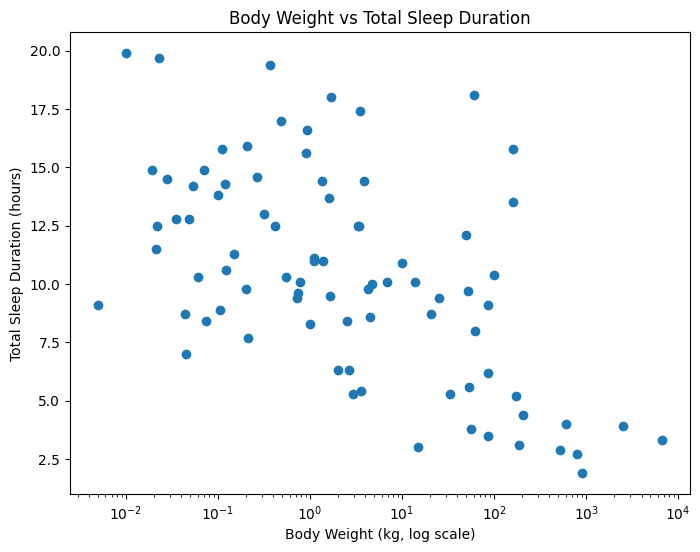

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['bodywt'], df['sleep_total'])
plt.xscale('log')
plt.xlabel('Body Weight (kg, log scale)')
plt.ylabel('Total Sleep Duration (hours)')
plt.title('Body Weight vs Total Sleep Duration')
plt.show()


The scatter plot shows a clear inverse relationship between body weight and total sleep duration, with small animals sleeping more and large animals sleeping less. Using a logarithmic scale for body weight allows clearer visualization of sleep patterns across animals with vastly different sizes.

## 6.3 Insights – Sleep by Body Weight (Final Section)

* Body weight shows a strong inverse relationship with total sleep duration, where smaller animals tend to sleep much longer than larger animals.

* Very small-bodied animals consistently exhibit high sleep duration, with no low-sleep exceptions observed, indicating a strong and reliable pattern.

* Very large-bodied animals show consistently low total sleep, supporting the conclusion that increased body size limits sleep duration.

* Aquatic and semi-aquatic animals sleep less than land animals of similar body weight, highlighting the additional influence of habitat on sleep behavior.

* Some medium-to-large land animals, particularly predators and omnivores, exhibit higher sleep duration, demonstrating that body weight alone does not fully determine sleep patterns.

Overall, body weight emerges as the strongest and most consistent factor influencing total sleep, while diet, taxonomic order, and habitat act as modifying factors.

---

## Final EDA Summary

This exploratory data analysis examined animal sleep patterns with the objective of understanding how sleep duration varies across taxonomic order, dietary category, and body weight.

### Key Findings

* Total sleep duration varies widely across animal species.

* Small-bodied animals consistently exhibit high total sleep duration.

* Large-bodied animals show very low total sleep duration.

* Aquatic animals sleep less than land animals of similar body weight.

* Dietary category partially explains sleep patterns, with insectivores sleeping more and herbivores sleeping less.

* REM sleep shows high variability and missing data, making it less consistent than total sleep.


### Overall Conclusion

The analysis shows that animal sleep behavior is shaped by multiple interacting factors rather than a single variable.
While dietary category and taxonomic order provide useful context, body weight is the most reliable predictor of total sleep duration, with habitat and lifestyle further modifying sleep patterns.
REM sleep exhibits greater variability and data limitations compared to total sleep, suggesting that conclusions about REM sleep should be interpreted cautiously.

### Key Takeaway

**Small animals sleep more, large animals sleep less, aquatic animals sleep the least — and total sleep shows stronger, more stable patterns than REM sleep.**

## End of Project – Conclusion